<a href="https://colab.research.google.com/github/Fisgche/Fisgche/blob/main/Trabalho1_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

In [4]:
facebook = pd.read_csv(
    "datalab/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [ ]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

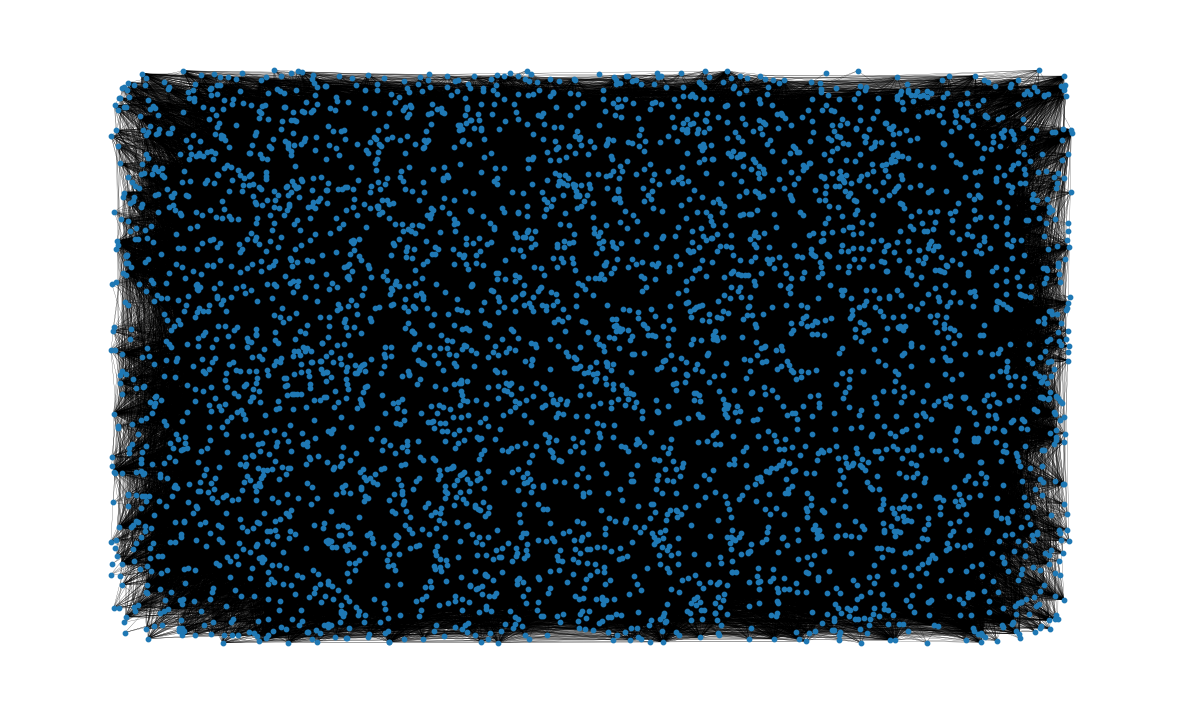

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

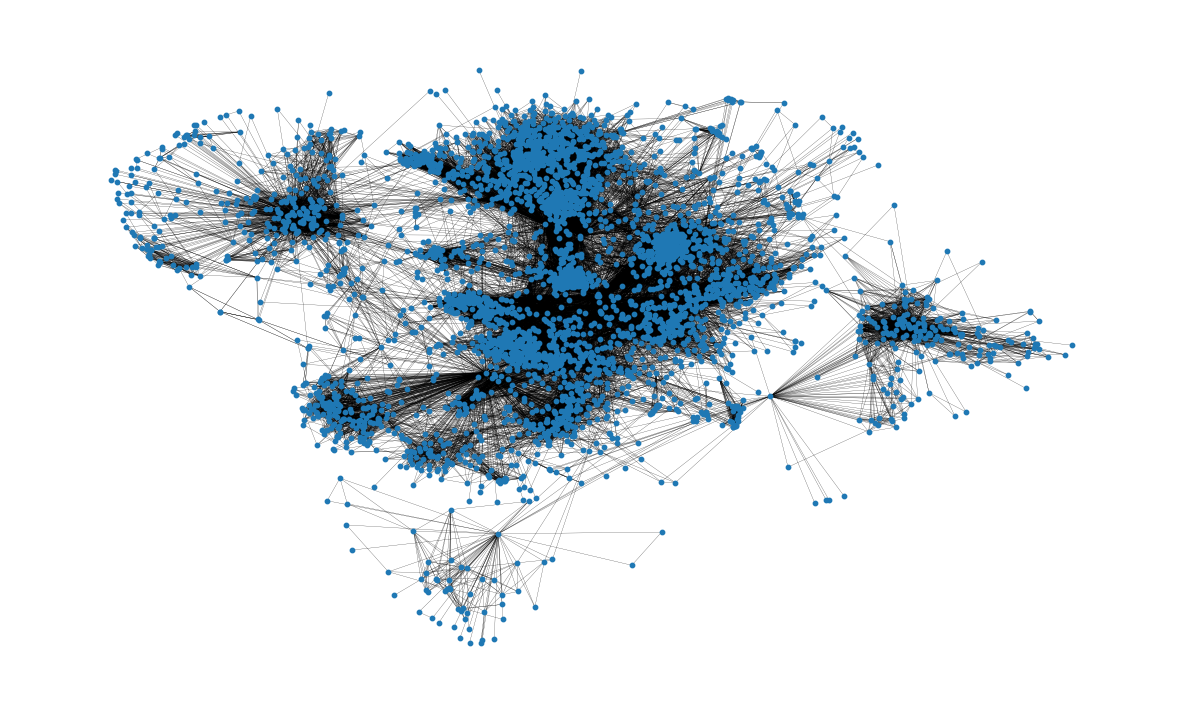

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

Text(0.5, 1.0, 'Layout Spectral')

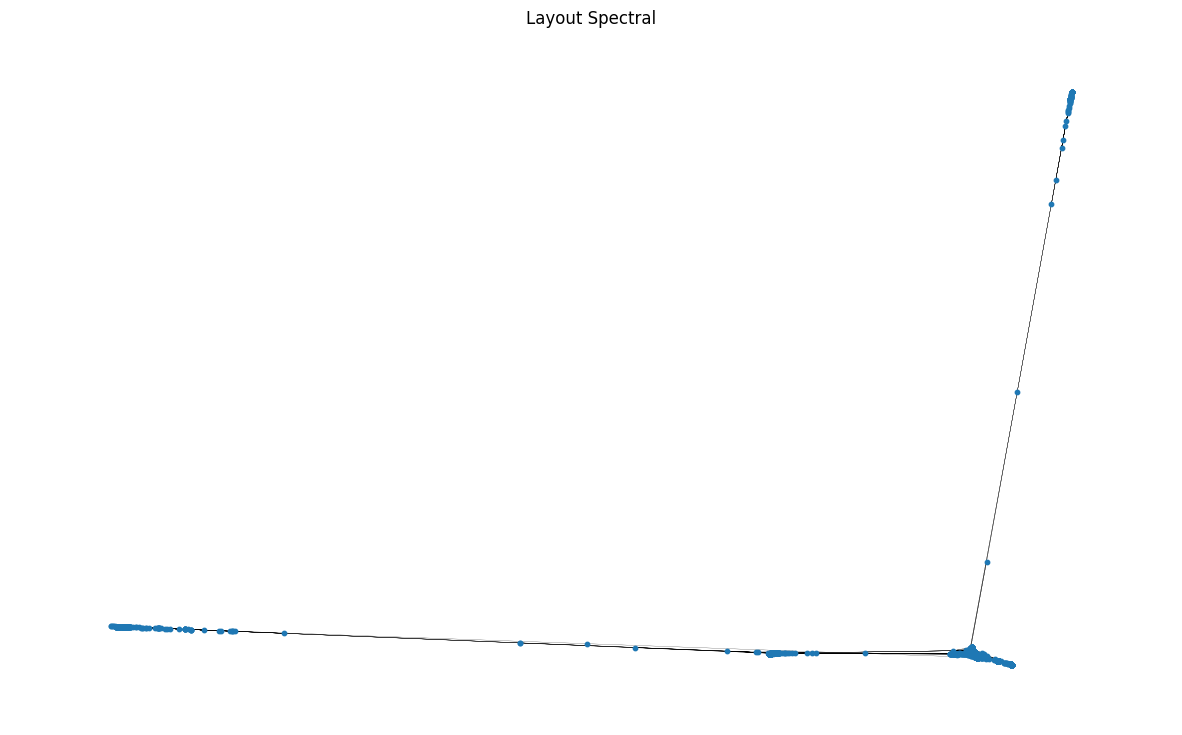

In [ ]:
# Layout com o algoritmo de eigenvetores (spectral_layout)
spectral_pos = nx.spectral_layout(G)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=spectral_pos, ax=ax, **plot_options)
plt.title("Layout Spectral")

In [ ]:
np.mean([d for _, d in G.degree()])


43.69101262688784

In [ ]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254)]

Text(0, 0.5, 'Quantidade')

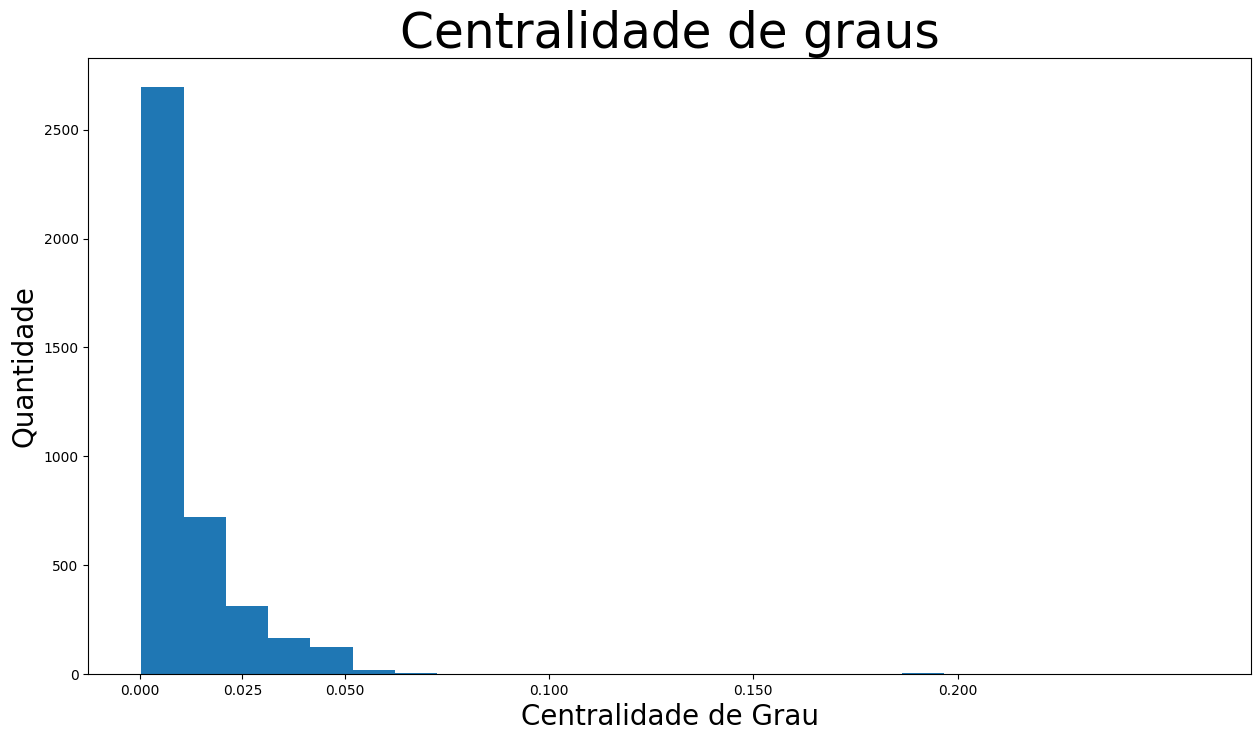

In [ ]:
degree_centrality = nx.centrality.degree_centrality(
    G
)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])
plt.title("Centralidade de graus", fontdict={"size": 35}, loc="center")
plt.xlabel("Centralidade de Grau", fontdict={"size": 20})
plt.ylabel("Quantidade", fontdict={"size": 20})

In [ ]:
nx.average_clustering(G)


0.6055467186200876

Text(0, 0.5, 'Quantidade')

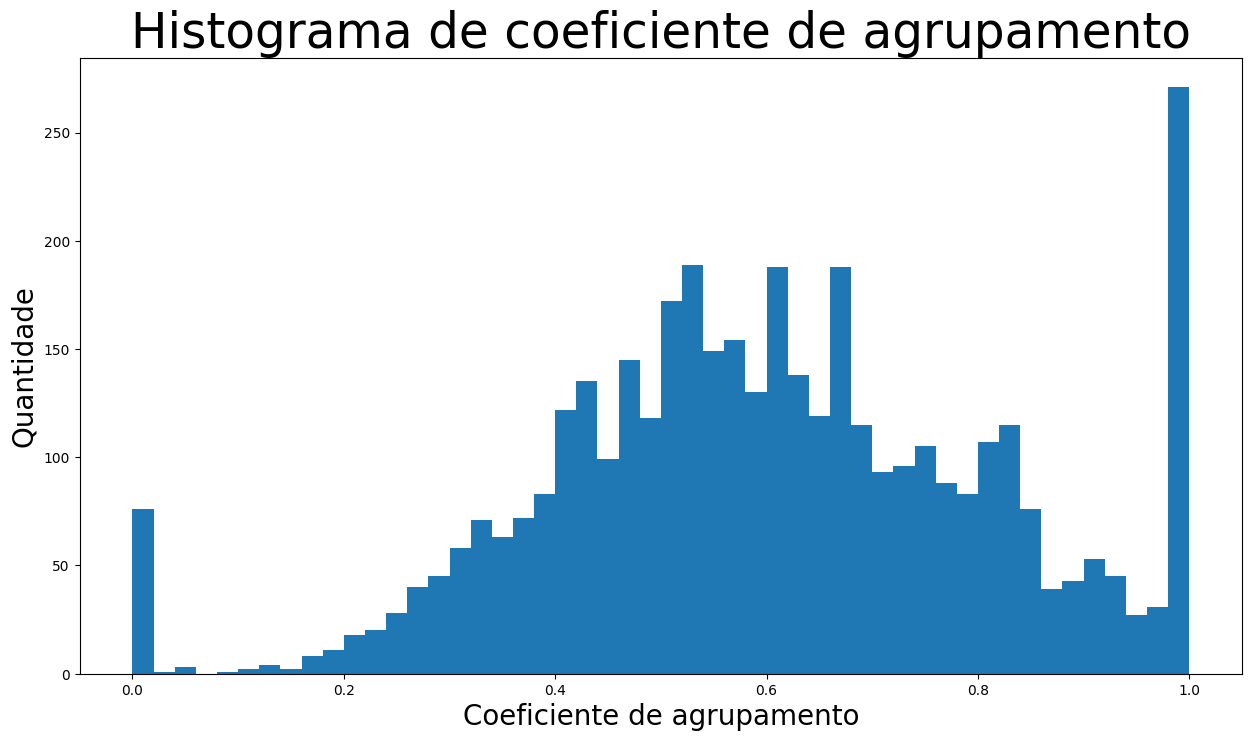

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Histograma de coeficiente de agrupamento", fontdict={"size": 35}, loc="center")
plt.xlabel("Coeficiente de agrupamento", fontdict={"size": 20})
plt.ylabel("Quantidade", fontdict={"size": 20})


Os "Efeitos de Aglomeração" em um grafo são medidos pelo coeficiente de aglomeração, que quantifica a probabilidade de que os amigos de um nó sejam amigos entre si. Um coeficiente de aglomeração médio próximo a 1 indica que o grafo é mais coeso, com grupos bem conectados. Isso sugere o fechamento de triângulos, um padrão de conexão comum.
No gráfico representado na Figura 4, podemos observar a distribuição dos coeficientes de aglomeração na rede. A maioria dos nós tem coeficientes de aglomeração próximos a 1, refletindo que muitos nós têm amigos que também são amigos entre si. Isso é particularmente evidente nos intervalos entre 0,8 e 1, sugerindo agrupamentos bem interconectados na rede. Isso demonstra uma forte tendência à formação de grupos coesos de conexões na rede.


A análise da rede social revelou várias propriedades interessantes sobre sua estrutura e dinâmica. A centralidade de grau destacou os nós mais centrais, mostrando como alguns usuários possuem um grande número de conexões, enquanto a maioria tem centralidades de grau mais baixas. Isso é uma característica comum em redes sociais, onde alguns indivíduos são extremamente populares, enquanto a maioria tem um círculo social menor.

Além disso, a investigação dos efeitos de aglomeração demonstrou que a rede exibe uma tendência à formação de grupos coesos de conexões. A presença de nós com coeficientes de aglomeração próximos a 1 indica que muitos amigos de um nó também são amigos entre si, refletindo o fenômeno de fechamento triádico.

Essas análises proporcionaram insights valiosos sobre a topologia e a conectividade da rede social, auxiliando na compreensão de como os indivíduos interagem e formam grupos dentro da rede. Essas informações são cruciais para compreender aspectos sociais e comportamentais em contextos digitais e sociais.
